In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-07-25 20:11:34--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2022-07-25 20:11:34 (90.4 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['smoker'] = le.fit_transform(dataset['smoker'])
dataset['region'] = le.fit_transform(dataset['region'])

In [4]:
cleanset = dataset.drop(['sex','children','region'],axis = 1)
dataset = cleanset
dataset.head()

,age,bmi,smoker,expenses
0,19,27.9,1,16884.92
1,18,33.8,0,1725.55
2,28,33.0,0,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


In [5]:
train_dataset = dataset.sample(frac=0.8)
train_dataset.shape
train_dataset.head()

,age,bmi,smoker,expenses
1043,28,25.8,0,3161.45
852,46,35.5,1,42111.66
1243,28,33.1,0,3171.61
739,29,35.5,1,44585.46
951,51,42.9,1,47462.89


In [6]:
test_dataset = dataset[
                  ~dataset.isin(train_dataset)
].dropna()
test_dataset.shape

(268, 4)

In [7]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [8]:
train_dataset.head()

,age,bmi,smoker
1043,28,25.8,0
852,46,35.5,1
1243,28,33.1,0
739,29,35.5,1
951,51,42.9,1


In [9]:
#normalization layer
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))
print(normalizer.mean.numpy())



[[39.457943   30.780842    0.20560741]]


In [33]:
#Build DNN model
model = keras.Sequential()

model.add(normalizer)
model.add(layers.Dense(128, input_shape = (train_dataset.shape[1],), activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))

optimizer = tf.keras.optimizers.Adam(0.001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])

model.fit(
    train_dataset, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense_44 (Dense)            (None, 128)               512       
                                                                 
 dense_45 (Dense)            (None, 128)               16512     
                                                                 
 dense_46 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,160
Trainable params: 17,153
Non-trainable params: 7
_________________________________________________________________


9/9 - 0s - loss: 27970400.0000 - mae: 3437.6025 - mse: 27970400.0000 - 27ms/epoch - 3ms/step
Testing set Mean Abs Error: 3437.60 expenses
You passed the challenge. Great job!


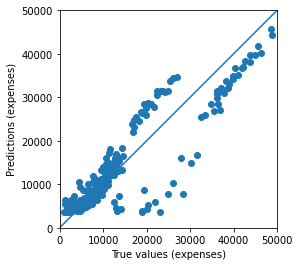

In [34]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)